In [2]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("coda",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
#library(doMC)
#library(foreach)
library(coda)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(qqman)
library(qqplotr)


setwd("/panicle/ssapkot/StarchProtein")

In [8]:
df = read.table("data/SAP_Cov_all.txt", sep='\t',header=F)
head(df)
cov = df[,c(1,4)]
# head(cov)
write.table(cov,"data/SAP_TGW.txt", row.names=FALSE, col.names=FALSE)


V1,V2,V3,V4
1,-7.235870,18.34477,3.193147
1,-7.566349,88.60509,-5.884034
1,5.349072,53.18864,6.544866
1,5.288356,-30.62933,-7.709419
1,-4.744867,-33.35904,-5.226989
1,12.015334,50.29836,1.434151


chr,rs,ps,n_miss,allele1,allele0,af,beta,se,l_remle,l_mle,p_wald,p_lrt,p_score
1,S1_2404,2404,75,C,A,0.056,-0.21613100,0.18588570,2.503554,2.624761,0.24566590,0.24449450,0.24570370
1,S1_2482,2482,10,C,G,0.082,0.23991430,0.18176710,2.453763,2.567288,0.18765090,0.18870380,0.19075040
1,S1_14393,14393,15,T,C,0.225,-0.08054916,0.09397390,2.500661,2.635425,0.39189720,0.39073650,0.39153280
1,S1_14632,14632,93,C,A,0.145,-0.21484950,0.11947710,2.416564,2.532439,0.07291887,0.07339976,0.07534305
1,S1_20388,20388,75,T,A,0.314,0.09034961,0.08769795,2.567900,2.708900,0.30354420,0.29857460,0.30032300
1,S1_23566,23566,60,G,T,0.091,-0.05785098,0.15362370,2.520900,2.641389,0.70669570,0.70676010,0.70702070


chr,rs,ps,n_miss,allele1,allele0,af,beta,se,l_remle,l_mle,p_wald,p_lrt,p_score
1,S1_2404,2404,75,C,A,0.056,-0.21613100,0.18588570,2.503554,2.624761,0.24566590,0.24449450,0.24570370
1,S1_2482,2482,10,C,G,0.082,0.23991430,0.18176710,2.453763,2.567288,0.18765090,0.18870380,0.19075040
1,S1_14393,14393,15,T,C,0.225,-0.08054916,0.09397390,2.500661,2.635425,0.39189720,0.39073650,0.39153280
1,S1_14632,14632,93,C,A,0.145,-0.21484950,0.11947710,2.416564,2.532439,0.07291887,0.07339976,0.07534305
1,S1_20388,20388,75,T,A,0.314,0.09034961,0.08769795,2.567900,2.708900,0.30354420,0.29857460,0.30032300
1,S1_23566,23566,60,G,T,0.091,-0.05785098,0.15362370,2.520900,2.641389,0.70669570,0.70676010,0.70702070


[1] 140763

[1] 6.599941

,chr,rs,ps,n_miss,allele1,allele0,af,beta,se,l_remle,l_mle,p_wald,p_lrt,p_score,log_p
1500,1,S1_4067535,4067535,32,C,T,0.443,-0.3957198,0.07536963,2.278279,2.397635,2.512229e-07,2.373447e-07,6.056353e-07,6.599941
1495,1,S1_4067364,4067364,31,C,A,0.388,-0.3930859,0.07674154,2.456136,2.590039,4.778861e-07,4.283091e-07,9.904709e-07,6.320676
1496,1,S1_4067377,4067377,31,C,A,0.388,-0.3901292,0.07672736,2.470193,2.605028,5.756496e-07,5.153185e-07,1.165145e-06,6.239842
1501,1,S1_4067555,4067555,34,A,G,0.442,-0.3798914,0.07565717,2.311836,2.434844,7.859513e-07,7.392774e-07,1.634249e-06,6.104604
69783,4,S4_61682634,61682634,107,C,T,0.096,-0.6675899,0.14866450,1.908138,1.997462,9.393776e-06,1.239281e-05,2.525918e-05,5.027160
115067,8,S8_59121722,59121722,28,C,G,0.247,-0.3591151,0.08000325,2.852154,3.023131,9.470535e-06,8.691095e-06,1.536729e-05,5.023625


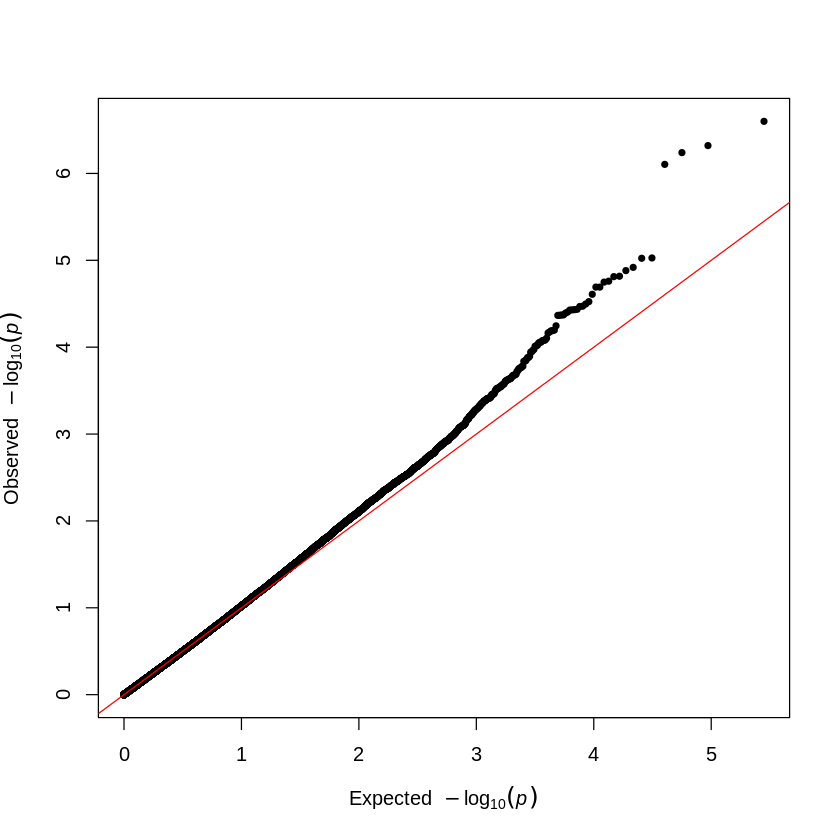

In [7]:
file = read.table('results/GWAS/SAP_GWAS_Starch-CovYPP.assoc.txt', stringsAsFactors=FALSE, sep='\t', header=TRUE)
head(file)
#file$p_wald <- file$p_lrt
# observed <- sort(file$p_wald)
# lobs <- -(log10(observed))

# expected <- c(1:length(observed)) 
# lexp <- -(log10(expected / (length(expected)+1)))

# pdf("qqplot.pdf", width=6, height=6)
# plot(c(0,7), c(0,7), col="red", lwd=3, type="l", xlab="Expected (-logP)", ylab="Observed (-logP)", xlim=c(0,7), ylim=c(0,7), las=1, xaxs="i", yaxs="i", bty="l")
# points(lexp, lobs, pch=23, cex=.4, bg="black") 
# dev.off()

#png('results/QQ_StaCovPrt_maf0.05.png', width=300, height=300)
qq(file$p_wald)
#dev.off()
#file$p.adj = p.adjust(file$p_wald, method="BH")
head(file)
#qq(file$p_wald)
file$log_p = -log10(file$p_wald)
#file\$adj.P <- p.adjust(file\$gamma, method = 'bonferroni') ##bonferroni-correction
sig <- -log10(0.05/nrow(file))
nrow(file)
#sig <- 5
sugg <- 5
max(file$log_p)

gwas.sig <- file[file$log_p > sig,]
mysnps <- gwas.sig$rs
head(file[order(-file$log_p),])
#write.csv(gwas.sig, '/panicle/ssapkot/GrainComp/RF/results_features/data/BSLMM/LMM_MultiVariate_SP_sigSNPs.csv', row.names=FALSE)

In [4]:
####GWAS_plotting_manhattan function
library(ggrepel)
gg.manhattan <- function(df, threshold, hlight, ylims, title){
nCHR <- length(unique(df$chr))
df$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(df$chr)){
      nbp[i] <- max(df[df$chr == i,]$ps)
        df[df$chr == i,'BPcum'] <- df[df$chr == i,'ps'] + s
          s <- s + nbp[i]
      }

###Setting up the parameters and axis
axis.set <- df %>%
  group_by(chr) %>%
    summarize(center = (max(BPcum) + min(BPcum)) / 2)

   # ylim <- abs(floor(log10(min(df\$gamma)))) + 2

    df.tmp <- df %>%
         # Add highlight and annotation information
            mutate( is_highlight=ifelse(rs %in% hlight, 'yes', 'no')) %>%
            mutate( is_annotate=ifelse(log_p > threshold, 'yes', 'no'))

  ggplot(df.tmp, aes(x=BPcum, y=log_p)) +
    geom_point(aes(color=as.factor(chr)), alpha = 0.8, size = 2) +
    ##add highlighted points
    #geom_point(data=subset(df.tmp, is_highlight=='yes'), color='darkgreen', size=2) +

    #custom axes
    scale_color_manual(values = rep(c('darkslateblue','orange'), nCHR)) +
    scale_x_continuous(label = axis.set$chr, breaks = axis.set$center) +
    scale_y_continuous(expand = c(0,0), limits = ylims) +

    # add genome-wide significant and suggested lines
    geom_hline(yintercept = sig, color = 'forestgreen', linetype = 'dashed') +
    #geom_hline(yintercept = sugg, color = 'blue', linetype = 'dashed') +

    ggtitle(paste0(title)) +
    labs(x = 'chromosome', y = '-log10(P)') +

    # Add label using ggrepel to avoid overlapping
    #geom_label_repel(data=df.tmp[df.tmp$is_annotate=='yes',], aes(label=as.factor(rs), alpha=0.7), size=5, force=1.3) +

    #customize the theme
    theme_bw(base_size=20) +
    theme(
    legend.position = 'none',
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text(angle = 0,  vjust = 0.5))
    }

png 
  2

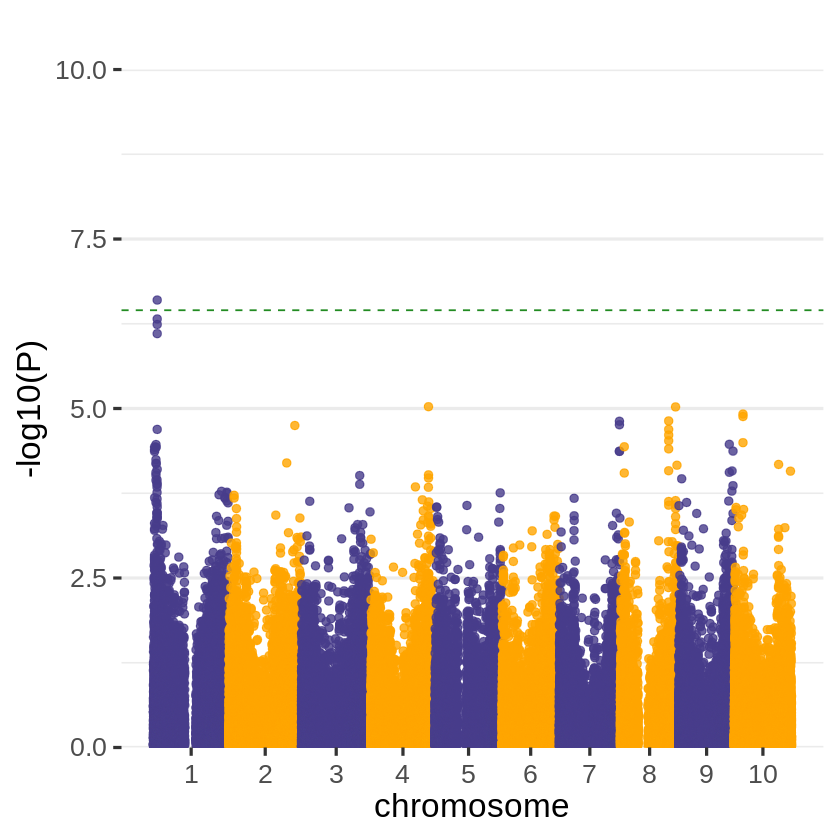

In [8]:
png('results/GWAS/SAP_StarchCovYPP_GWAS_QK.png', width=1200, height=400)
gg.manhattan(file, sig, mysnps, c(0,10),'')
dev.off()
 
gg.manhattan(file, sig, mysnps, c(0,10),'')